# Task 

# You have a data set

# Unsupervised+supervised=semisupervised

classification data(wafer data)

you have a multiple files 

take all the files and create a single dataframe

then you have to perform clustering(kmean,hirarchical,dbscan)

after clustering the data will be segeregated in different clsuters

then you have to perform supervised mllearning(log reg,svc,DTC,RF, boosting classifier) on each and every cluster
and find out the best algorithm

# Supervised Machine Learing perform(log , reg , svc , dtc , rf , boosting classifier)

### Dateset Details

#### Columns:- 3980
####  Row : - 629
### Target Feature : - Good/Bad 
##### Good:- 1
####  Bad :- -1



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# convert multiple file data in singke data frame
df = pd.concat(map(pd.read_csv, ['Wafer_15010_130532.csv', 'Wafer_07012020_000000.csv','wafer_07012020_041011.csv' , 'Wafer_07012020_223345.csv','Wafer_08012020_120000.csv' , 'Wafer_10012020_131534.csv' , 'Wafer_11012020_151432.csv' , 'Wafer_12012020_111.csv','Wafer_12012020_111213.csv' , 'wafer_13012020_090817.csv' , 'Wafer_13012020_141000.csv' , 'Wafer_14012020_113045.csv' , 'Wafer_15012020_130532.csv' , 'wafer_16012020_051629.csv' , 'wafer_16012020_134553.csv' , 'wafer_17012020_125434.csv' , 'Wafer_18012020_121532.csv' , 'Wafer_19012020_141432.csv' , 'wafer_20012020_090819.csv' , 'Wafer_20012020_135132.csv' , 'wafer_20022020_090716.csv' , 'wafer_21012020_080913.csv' , 'Wafer_21012020_143634.csv' , 'Wafer_22012020_173245.csv' , 'wafer_22022020_041119.csv' , 'wafer_23012020_011008.csv' , 'wafer_23012020_041211.csv' , 'Wafer_23012020_163456.csv' , 'Wafer_24012020_150121.csv' , 'Wafer_25012020_142112.csv' , 'wafer_27012020_080911.csv' , 'wafer_28012020_051011.csv' , 'wafer_28012020_090817.csv' , 'wafer_28042020_031911.csv' , 'wafer_29012020_050617.csv' , 'wafer_29012020_060756.csv' , 'wafer_31012020_090811.csv' , 'Wafer_fault_detection.csv' , 'Wafer_text_130532.csv' , 'Wafer12_20012.csv' , 'Waferdefault_15010_130532.csv']))

In [7]:
df.columns

Index(['Unnamed: 0', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4',
       'Sensor-5', 'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Unnamed: 581', 'Unnamed: 582', 'Unnamed: 583', 'Unnamed: 584',
       'Unnamed: 585', 'Unnamed: 586', 'Unnamed: 587', 'Unnamed: 588',
       'Unnamed: 589', 'Unnamed: 590'],
      dtype='object', length=629)

In [13]:
df.shape

(3980, 629)

In [8]:
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Unnamed: 581,Unnamed: 582,Unnamed: 583,Unnamed: 584,Unnamed: 585,Unnamed: 586,Unnamed: 587,Unnamed: 588,Unnamed: 589,Unnamed: 590
0,Wafer-800,3002.22,2462.06,2202.1222,1833.3772,1.8005,100.0,95.8500,0.1242,1.5173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wafer-500,3047.28,2186.06,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wafer-501,3076.81,2158.75,2208.2334,1517.0152,1.0980,100.0,110.1900,0.1247,1.4357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wafer-502,2951.62,2511.92,2253.5111,1397.5060,0.9660,100.0,109.7611,0.1210,1.5527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wafer-503,2930.42,2505.17,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isna().sum()

Unnamed: 0         0
Sensor-1          17
Sensor-2          20
Sensor-3          38
Sensor-4          38
                ... 
Unnamed: 586    3980
Unnamed: 587    3980
Unnamed: 588    3980
Unnamed: 589    3980
Unnamed: 590    3980
Length: 629, dtype: int64

In [40]:
# drop nan value columns

df = df.iloc[: ,:592]

In [41]:
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-800,3002.22,2462.06,2202.1222,1833.3772,1.8005,100.0,95.8500,0.1242,1.5173,...,NaN,0.5021,0.0071,0.0024,1.4182,0.0545,0.0184,0.0055,33.7876,NaN
1,Wafer-500,3047.28,2186.06,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4619,...,NaN,0.4998,0.0131,0.0033,2.6229,0.0222,0.0182,0.0060,81.9472,NaN
2,Wafer-501,3076.81,2158.75,2208.2334,1517.0152,1.0980,100.0,110.1900,0.1247,1.4357,...,64.2405,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405,NaN
3,Wafer-502,2951.62,2511.92,2253.5111,1397.5060,0.9660,100.0,109.7611,0.1210,1.5527,...,0.0000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000,NaN
4,Wafer-503,2930.42,2505.17,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4588,...,NaN,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000,NaN


In [42]:
df.isna().sum()

Unnamed: 0       0
Sensor-1        17
Sensor-2        20
Sensor-3        38
Sensor-4        38
              ... 
Sensor-587     100
Sensor-588     100
Sensor-589     100
Sensor-590     100
Good/Bad      2443
Length: 592, dtype: int64

In [43]:
df['Good/Bad'].unique()

array([nan, -1.,  1.])

In [45]:
#Unnamed: 0 this columns

df = df.drop('Unnamed: 0' , axis = 1)

In [66]:
# replace nan value with mode
df['Good/Bad'].mode()

0   -1.0
Name: Good/Bad, dtype: float64

In [68]:
df['Good/Bad'] = df['Good/Bad'].fillna(value = -1)

In [76]:
df.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,3002.22,2462.06,2202.1222,1833.3772,1.8005,100.0,95.8500,0.1242,1.5173,0.0069,...,NaN,0.5021,0.0071,0.0024,1.4182,0.0545,0.0184,0.0055,33.7876,-1.0
1,3047.28,2186.06,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4619,0.0189,...,NaN,0.4998,0.0131,0.0033,2.6229,0.0222,0.0182,0.0060,81.9472,-1.0
2,3076.81,2158.75,2208.2334,1517.0152,1.0980,100.0,110.1900,0.1247,1.4357,0.0089,...,64.2405,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405,-1.0
3,2951.62,2511.92,2253.5111,1397.5060,0.9660,100.0,109.7611,0.1210,1.5527,0.0119,...,0.0000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000,-1.0
4,2930.42,2505.17,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4588,-0.0143,...,NaN,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000,-1.0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3980 entries, 0 to 100
Columns: 591 entries, Sensor-1 to Good/Bad
dtypes: float64(588), object(3)
memory usage: 18.1+ MB


In [91]:
# Find object columns
for col in df.columns:
    if df[col].dtypes == "O":
        print(col)

Sensor-332
Sensor-576
Sensor-586


In [92]:
df['Sensor-332'].unique()

array([0.0622, 0.0856, 0.0848, 0.0806, 0.105, 0.0924, 0.0775, 0.1012,
       0.0769, 0.0804, 0.0932, 0.0921, 0.0623, 0.0852, 0.0868, 0.0817,
       0.0887, 0.097, 0.0929, 0.1017, 0.0764, 0.0855, 0.0643, 0.0599,
       0.087, 0.0944, 0.0652, 0.0811, 0.0624, 0.0909, 0.0871, 0.0796,
       0.0925, 0.0639, 0.0613, 0.0765, 0.065, 0.0954, 0.0858, 0.1019,
       0.0263, 0.0823, 0.0807, 0.0619, 0.0664, 0.0688, 0.0849, 0.0252,
       0.0833, 0.0278, 0.0356, 0.0315, 0.0336, 0.1051, 0.0324, 0.03,
       0.0306, 0.0318, 0.0956, 0.0573, 0.1157, 0.0368, 0.0311, 0.0845,
       0.0935, 0.0328, 0.1257, 0.0989, 0.0353, 0.084, 0.0323, 0.0792,
       0.0819, 0.0374, 0.1114, 0.036, 0.0786, 0.0791, 0.031, 0.0272,
       0.1104, 0.079, 0.1111, 0.0337, 0.1005, 0.0572, 0.0805, 0.0953,
       0.0334, 0.0329, 0.0829, 0.1065, 0.0797, 0.09, 0.0783, 0.0378,
       0.0333, 0.0892, 0.1011, 0.0344, 0.0452, 0.0822, 0.0352, 0.0345,
       0.0867, 0.0851, 0.1003, 0.089, 0.1, 0.1124, 0.0326, 0.0997, 0.0824,
       0.1067,

In [94]:
df['Sensor-576'].unique()

array([0.1285, 0.1056, 0.0724, 0.08, 0.053, 0.1169, 0.0736, 0.0937,
       0.0753, 0.286, 0.1222, 0.1346, 0.0953, 0.0584, 0.0738, 0.3337,
       0.087, 0.0925, 0.0963, 0.0858, 0.1111, 0.0985, 0.0726, 0.0966,
       0.0923, 0.0782, 0.0745, 0.0757, 0.2255, 0.0883, 0.099, 0.1102,
       0.3883, 0.0429, 0.1038, 0.1153, 0.0994, 0.0855, 0.0771, 0.071,
       0.0777, 0.0905, 0.056, 0.0868, 0.0415, 0.0705, 0.0758, 0.1197,
       0.0663, 0.1065, 0.0854, 0.0939, 0.0617, 0.0819, 0.0833, 0.0928,
       0.0892, 0.1139, 0.066, 0.1052, 0.0772, 0.1565, 0.0861, 0.0862,
       0.0827, 0.0557, 0.1311, 0.0879, 0.103, 0.042, 0.1288, 0.0899,
       0.1101, 0.1026, 0.0377, 0.0808, 0.0818, 0.0814, 0.3764, 0.0671,
       0.1226, 0.383, 0.1189, 0.0849, 0.1495, 0.1086, 0.0828, 0.0751,
       0.1255, 0.1016, 0.105, 0.0898, 0.0358, 0.1336, 0.0728, 0.3247,
       0.1355, 0.0793, 0.1018, 0.0775, 0.0613, 0.0378, 0.1441, 0.1331,
       0.1213, 0.054, 0.0927, 0.076, 0.1286, 0.2947, 0.1483, 0.104,
       0.0674, 0.1198,

In [102]:
# drop this columns
df = df.drop('Sensor-576' , axis = 1)

In [115]:
# drop this columns

df = df.drop('Sensor-332', axis = 1)

In [112]:
df['Sensor-586'].unique()

array([1.4182, 2.6229, 3.0319, ..., 2.7314, 2.9604, 3.8875])

In [109]:
df['Sensor-586']=df['Sensor-586'].replace('string ' , np.nan)

In [117]:
# replace nan values with mean

for col in df.columns:
    df[col] = df[col].fillna(value = np.mean(df[col]))

In [118]:
df.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,3002.22,2462.06,2202.1222,1833.3772,1.8005,100.0,95.8500,0.1242,1.5173,0.0069,...,97.422749,0.5021,0.0071,0.0024,1.4182,0.0545,0.0184,0.0055,33.7876,-1.0
1,3047.28,2186.06,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4619,0.0189,...,97.422749,0.4998,0.0131,0.0033,2.6229,0.0222,0.0182,0.0060,81.9472,-1.0
2,3076.81,2158.75,2208.2334,1517.0152,1.0980,100.0,110.1900,0.1247,1.4357,0.0089,...,64.240500,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405,-1.0
3,2951.62,2511.92,2253.5111,1397.5060,0.9660,100.0,109.7611,0.1210,1.5527,0.0119,...,0.000000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000,-1.0
4,2930.42,2505.17,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4588,-0.0143,...,97.422749,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000,-1.0


In [119]:
df.isna().sum()

Sensor-1      0
Sensor-2      0
Sensor-3      0
Sensor-4      0
Sensor-5      0
             ..
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Good/Bad      0
Length: 589, dtype: int64

In [121]:
# Define Independent and Dependent columns


In [124]:
X = df.iloc[: , :-1]

In [125]:
y = df['Good/Bad']

In [126]:
y

0     -1.0
1     -1.0
2     -1.0
3     -1.0
4     -1.0
      ... 
96    -1.0
97    -1.0
98    -1.0
99    -1.0
100   -1.0
Name: Good/Bad, Length: 3980, dtype: float64

In [127]:
X

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,3002.22,2462.06,2202.1222,1833.3772,1.8005,100.0,95.8500,0.1242,1.5173,0.0069,...,0.005357,97.422749,0.5021,0.0071,0.0024,1.4182,0.0545,0.0184,0.0055,33.7876
1,3047.28,2186.06,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4619,0.0189,...,0.005357,97.422749,0.4998,0.0131,0.0033,2.6229,0.0222,0.0182,0.0060,81.9472
2,3076.81,2158.75,2208.2334,1517.0152,1.0980,100.0,110.1900,0.1247,1.4357,0.0089,...,0.009000,64.240500,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405
3,2951.62,2511.92,2253.5111,1397.5060,0.9660,100.0,109.7611,0.1210,1.5527,0.0119,...,0.008100,0.000000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000
4,2930.42,2505.17,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4588,-0.0143,...,0.005357,97.422749,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2989.44,2487.66,2201.0667,880.2317,1.4148,100.0,106.5478,0.1211,1.5301,-0.0023,...,0.005357,97.422749,0.4933,0.0126,0.0032,2.5579,0.0227,0.0149,0.0052,65.4831
97,2996.89,2492.40,2217.8667,1275.0917,1.5487,100.0,105.2933,0.1230,1.5455,-0.0140,...,0.005357,97.422749,0.5071,0.0123,0.0038,2.4294,0.0227,0.0149,0.0052,65.4831
98,2990.85,2485.99,2167.9444,861.8041,1.4140,100.0,106.6033,0.1243,1.4647,-0.0212,...,0.005357,97.422749,0.5015,0.0130,0.0042,2.5884,0.0227,0.0149,0.0052,65.4831
99,3059.43,2473.55,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.4262,-0.0209,...,0.011400,108.607600,0.4973,0.0073,0.0017,1.4716,0.0300,0.0326,0.0114,108.6076


In [138]:
num_cols = X.select_dtypes(exclude='O').columns

In [139]:
num_cols

Index(['Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5', 'Sensor-6',
       'Sensor-7', 'Sensor-8', 'Sensor-9', 'Sensor-10',
       ...
       'Sensor-581', 'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585',
       'Sensor-586', 'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590'],
      dtype='object', length=588)

In [164]:
# import models

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [142]:
## Create pipeline

# num_pipeline

num_pipeline = Pipeline(
                steps =[
                    ('imputer' , SimpleImputer(strategy='median')),
                    ('scaler' , StandardScaler())
                ])

# Columns transformer

preprocessor = ColumnTransformer(
    [
        ('num_pipeline' , num_pipeline , num_cols)
    ])

In [130]:
# train test split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 40)

In [131]:
X_train

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
72,3033.110000,2435.14,2172.3111,1202.5347,1.2955,100.0,101.3556,0.1212,1.4620,-0.0172,...,0.005357,97.422749,0.5006,0.0149,0.0038,2.9786,0.0096,0.0191,0.0069,197.5077
74,3000.460000,2523.08,2191.9000,1936.7653,1.5291,100.0,98.1244,0.1254,1.4051,-0.0276,...,0.005357,97.422749,0.4977,0.0138,0.0038,2.7796,0.0313,0.0208,0.0066,66.4172
5,3039.640000,2529.79,2223.0444,1194.5986,1.2016,100.0,112.5811,0.1229,1.5576,-0.0098,...,0.005357,97.422749,0.5005,0.0099,0.0020,1.9709,0.0230,0.0210,0.0053,91.4264
74,3027.720000,2430.70,2192.1889,1435.9611,2.3870,100.0,107.3989,0.1229,1.5697,-0.0122,...,0.005357,97.422749,0.5046,0.0125,0.0032,2.4810,0.0458,0.0277,0.0100,60.5430
0,3017.500000,2634.30,2183.4556,955.9073,1.1048,100.0,102.6978,0.1223,1.4700,-0.0092,...,0.005000,71.575300,0.5059,0.0082,0.0025,1.6240,0.0208,0.0149,0.0050,71.5753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,3013.811812,2810.12,2232.5889,1717.2750,1.6700,100.0,104.1067,0.1223,1.5166,-0.0141,...,0.003300,44.122000,0.5018,0.0106,0.0024,2.1178,0.0231,0.0102,0.0033,44.1220
74,3002.150000,2486.94,2218.7778,2080.6085,2.1254,100.0,91.0211,0.1229,1.4093,-0.0010,...,0.003300,47.075400,0.5008,0.0112,0.0024,2.2391,0.0193,0.0091,0.0033,47.0754
16,2980.290000,2508.52,2060.6600,1410.3599,3.8894,100.0,96.6256,0.1181,1.6057,0.0023,...,0.005357,97.422749,0.5034,0.0166,0.0042,3.2954,0.0052,0.0203,0.0068,390.4146
28,3072.100000,2534.87,2177.4333,2945.8855,1.3321,100.0,83.1700,0.1253,1.4359,-0.0114,...,0.002300,26.733000,0.5010,0.0132,0.0035,2.6249,0.0277,0.0074,0.0023,26.7330


In [132]:
X_test

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
54,3012.68,2420.35,2172.311100,1202.534700,1.295500,100.0,101.355600,0.1212,1.3885,0.0017,...,0.005357,97.422749,0.505600,0.010000,0.002500,1.973100,0.020200,0.006900,0.002800,34.179300
40,2898.17,2547.65,2199.344513,1380.313126,4.701892,100.0,101.152286,0.0000,1.4425,0.0222,...,0.005357,97.422749,0.503600,0.016100,0.004000,3.190200,0.016700,0.031000,0.008400,185.357800
73,3114.92,2574.48,2200.066600,1012.674700,1.395400,100.0,103.064400,0.1212,1.4207,0.0101,...,0.004800,79.775200,0.504300,0.012800,0.003800,2.537300,0.019900,0.015900,0.004800,79.775200
22,3111.43,2528.73,2260.733300,1969.786700,1.210900,100.0,91.336700,0.1207,1.4144,0.0033,...,0.005900,51.069500,0.499000,0.013600,0.003400,2.718400,0.035400,0.018100,0.005900,51.069500
86,2885.72,2575.71,2218.577800,1632.273400,0.839600,100.0,98.131100,0.1211,1.4446,-0.0318,...,0.005100,510.041000,0.499400,0.030300,0.006400,6.063400,0.003200,0.016400,0.005100,510.041000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2972.52,2454.80,2180.555600,1165.135100,0.789200,100.0,101.457800,0.1226,1.5424,0.0197,...,0.005357,97.422749,0.500135,0.015113,0.003797,3.022087,0.021258,0.016487,0.005294,97.426643
19,3056.58,2505.62,2219.344500,1734.843500,0.980000,100.0,104.386700,0.1221,1.5343,-0.0013,...,0.005357,97.422749,0.495800,0.017000,0.004200,3.436700,0.041900,0.009800,0.003200,23.385200
34,3011.84,2604.99,2167.944400,861.804100,1.414000,100.0,106.603300,0.1243,1.3857,-0.0027,...,0.003300,44.368600,0.501600,0.015500,0.003500,3.091900,0.026300,0.011700,0.003300,44.368600
44,2996.28,2581.64,2212.300000,1807.584100,0.981600,100.0,92.370000,0.1212,1.3058,-0.0097,...,0.005357,97.422749,0.495300,0.016100,0.003500,3.251000,0.023600,0.009800,0.003200,41.487100


In [144]:
# Data  fit and transform
X_train = preprocessor.fit_transform(X_train)

In [146]:
X_test = preprocessor.transform(X_test)

In [147]:
X_train

array([[ 0.26198496, -0.76207927, -0.93509594, ...,  0.32322798,
         0.59759542,  1.03724212],
       [-0.18889222,  0.33481504, -0.2710286 , ...,  0.53046363,
         0.48663903, -0.35109641],
       [ 0.35216039,  0.4185103 ,  0.78477233, ...,  0.55484429,
         0.005828  , -0.08623179],
       ...,
       [-0.46742798,  0.15320507, -4.72008891, ...,  0.46951197,
         0.56060996,  3.08025883],
       [ 0.80041377,  0.48187422, -0.76145241, ..., -1.10304088,
        -1.10373592, -0.77137937],
       [ 1.11747778, -0.02104571, -0.66916593, ...,  0.27446665,
         0.33869718,  0.03521798]])

In [148]:
X_test

array([[-0.02014125, -0.94655809, -0.93509594, ..., -1.16399254,
        -0.9188086 , -0.69251794],
       [-1.60145656,  0.64128188, -0.01865824, ...,  1.77387751,
         1.15237738,  0.90856633],
       [ 1.39173263,  0.97593817,  0.00582066, ..., -0.06686265,
        -0.17909932, -0.209626  ],
       ...,
       [-0.03174115,  1.35649589, -1.08312787, ..., -0.5788566 ,
        -0.73388128, -0.58460624],
       [-0.24661554,  1.06524638,  0.42053518, ..., -0.81047291,
        -0.77086674, -0.61512331],
       [ 0.32923677, -1.56909613, -1.05638402, ...,  1.26188356,
         0.56060996,  0.04006852]])

In [163]:
# Create multiple models
models = {
    'logistic_regression' : LogisticRegression(),
    'svc' : SVC(),
    'Decision_tree_class' : DecisionTreeClassifier(),
    'Random_forest' : RandomForestClassifier(),
    'boosting' : GradientBoostingClassifier()
}


In [161]:
# Create evaluate_model function

from sklearn.metrics import accuracy_score
def evaluate_model(X_train,y_trian,X_test,y_test,models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(X_train,y_train)
        print(f"{model} - Model Score :- {model.score(X_train,y_train)}")
        
        y_pred=model.predict(X_test)
        
        accuracy=round(accuracy_score(y_test,y_pred)*100,2)
        
        report[list(models.keys())[i]]=accuracy
    
    return report

In [160]:
# Enter value in evaluate_model
evaluate_model(X_train,y_train,X_test,y_test,models)

C:\Users\maury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() - Model Score :- 0.9820531227566404
SVC() - Model Score :- 0.9773869346733668
DecisionTreeClassifier() - Model Score :- 0.9845656855707107
RandomForestClassifier() - Model Score :- 0.9845656855707107
GradientBoostingClassifier() - Model Score :- 0.9834888729361091


{'logistic_regression': 95.64,
 'svc': 97.49,
 'Decision_tree_class': 94.97,
 'Random_forest': 95.31,
 'boosting': 95.64}

# Observations

### Best model this SVC score is a 97.49 

# Unsupervised Machine learning

### perform clustering(kmean,hirarchical,dbscan)



## K-means algorithm :- 

In [166]:
df

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,3002.22,2462.06,2202.1222,1833.3772,1.8005,100.0,95.8500,0.1242,1.5173,0.0069,...,97.422749,0.5021,0.0071,0.0024,1.4182,0.0545,0.0184,0.0055,33.7876,-1.0
1,3047.28,2186.06,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4619,0.0189,...,97.422749,0.4998,0.0131,0.0033,2.6229,0.0222,0.0182,0.0060,81.9472,-1.0
2,3076.81,2158.75,2208.2334,1517.0152,1.0980,100.0,110.1900,0.1247,1.4357,0.0089,...,64.240500,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405,-1.0
3,2951.62,2511.92,2253.5111,1397.5060,0.9660,100.0,109.7611,0.1210,1.5527,0.0119,...,0.000000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000,-1.0
4,2930.42,2505.17,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4588,-0.0143,...,97.422749,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2989.44,2487.66,2201.0667,880.2317,1.4148,100.0,106.5478,0.1211,1.5301,-0.0023,...,97.422749,0.4933,0.0126,0.0032,2.5579,0.0227,0.0149,0.0052,65.4831,-1.0
97,2996.89,2492.40,2217.8667,1275.0917,1.5487,100.0,105.2933,0.1230,1.5455,-0.0140,...,97.422749,0.5071,0.0123,0.0038,2.4294,0.0227,0.0149,0.0052,65.4831,-1.0
98,2990.85,2485.99,2167.9444,861.8041,1.4140,100.0,106.6033,0.1243,1.4647,-0.0212,...,97.422749,0.5015,0.0130,0.0042,2.5884,0.0227,0.0149,0.0052,65.4831,-1.0
99,3059.43,2473.55,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.4262,-0.0209,...,108.607600,0.4973,0.0073,0.0017,1.4716,0.0300,0.0326,0.0114,108.6076,-1.0


In [175]:
# Independent Features
X = df.iloc[: , :-1]

In [176]:
X

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,3002.22,2462.06,2202.1222,1833.3772,1.8005,100.0,95.8500,0.1242,1.5173,0.0069,...,0.005357,97.422749,0.5021,0.0071,0.0024,1.4182,0.0545,0.0184,0.0055,33.7876
1,3047.28,2186.06,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4619,0.0189,...,0.005357,97.422749,0.4998,0.0131,0.0033,2.6229,0.0222,0.0182,0.0060,81.9472
2,3076.81,2158.75,2208.2334,1517.0152,1.0980,100.0,110.1900,0.1247,1.4357,0.0089,...,0.009000,64.240500,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405
3,2951.62,2511.92,2253.5111,1397.5060,0.9660,100.0,109.7611,0.1210,1.5527,0.0119,...,0.008100,0.000000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000
4,2930.42,2505.17,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4588,-0.0143,...,0.005357,97.422749,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2989.44,2487.66,2201.0667,880.2317,1.4148,100.0,106.5478,0.1211,1.5301,-0.0023,...,0.005357,97.422749,0.4933,0.0126,0.0032,2.5579,0.0227,0.0149,0.0052,65.4831
97,2996.89,2492.40,2217.8667,1275.0917,1.5487,100.0,105.2933,0.1230,1.5455,-0.0140,...,0.005357,97.422749,0.5071,0.0123,0.0038,2.4294,0.0227,0.0149,0.0052,65.4831
98,2990.85,2485.99,2167.9444,861.8041,1.4140,100.0,106.6033,0.1243,1.4647,-0.0212,...,0.005357,97.422749,0.5015,0.0130,0.0042,2.5884,0.0227,0.0149,0.0052,65.4831
99,3059.43,2473.55,2214.9333,1663.7024,1.0203,100.0,100.4456,0.1247,1.4262,-0.0209,...,0.011400,108.607600,0.4973,0.0073,0.0017,1.4716,0.0300,0.0326,0.0114,108.6076


In [177]:
# Dependent Feature
y = df.iloc[: , -1]

In [172]:
y

0     -1.0
1     -1.0
2     -1.0
3     -1.0
4     -1.0
      ... 
96    -1.0
97    -1.0
98    -1.0
99    -1.0
100   -1.0
Name: Good/Bad, Length: 3980, dtype: float64

In [178]:
# train test Split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state = 40)

In [179]:
X_train

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
72,3033.110000,2435.14,2172.3111,1202.5347,1.2955,100.0,101.3556,0.1212,1.4620,-0.0172,...,0.005357,97.422749,0.5006,0.0149,0.0038,2.9786,0.0096,0.0191,0.0069,197.5077
74,3000.460000,2523.08,2191.9000,1936.7653,1.5291,100.0,98.1244,0.1254,1.4051,-0.0276,...,0.005357,97.422749,0.4977,0.0138,0.0038,2.7796,0.0313,0.0208,0.0066,66.4172
5,3039.640000,2529.79,2223.0444,1194.5986,1.2016,100.0,112.5811,0.1229,1.5576,-0.0098,...,0.005357,97.422749,0.5005,0.0099,0.0020,1.9709,0.0230,0.0210,0.0053,91.4264
74,3027.720000,2430.70,2192.1889,1435.9611,2.3870,100.0,107.3989,0.1229,1.5697,-0.0122,...,0.005357,97.422749,0.5046,0.0125,0.0032,2.4810,0.0458,0.0277,0.0100,60.5430
0,3017.500000,2634.30,2183.4556,955.9073,1.1048,100.0,102.6978,0.1223,1.4700,-0.0092,...,0.005000,71.575300,0.5059,0.0082,0.0025,1.6240,0.0208,0.0149,0.0050,71.5753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,3013.811812,2810.12,2232.5889,1717.2750,1.6700,100.0,104.1067,0.1223,1.5166,-0.0141,...,0.003300,44.122000,0.5018,0.0106,0.0024,2.1178,0.0231,0.0102,0.0033,44.1220
74,3002.150000,2486.94,2218.7778,2080.6085,2.1254,100.0,91.0211,0.1229,1.4093,-0.0010,...,0.003300,47.075400,0.5008,0.0112,0.0024,2.2391,0.0193,0.0091,0.0033,47.0754
16,2980.290000,2508.52,2060.6600,1410.3599,3.8894,100.0,96.6256,0.1181,1.6057,0.0023,...,0.005357,97.422749,0.5034,0.0166,0.0042,3.2954,0.0052,0.0203,0.0068,390.4146
28,3072.100000,2534.87,2177.4333,2945.8855,1.3321,100.0,83.1700,0.1253,1.4359,-0.0114,...,0.002300,26.733000,0.5010,0.0132,0.0035,2.6249,0.0277,0.0074,0.0023,26.7330


In [181]:
from sklearn.cluster import KMeans

In [182]:
# find wcss

wcss=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,init="k-means++")
    kmean.fit(X_train)
    wcss.append(kmean.inertia_)

In [183]:
wcss

[138250491672.3899,
 104671600159.79022,
 87464460029.25441,
 78652222391.67068,
 70594372427.74036,
 63428043642.58571,
 57656190542.58047,
 53843213796.40045,
 51324946237.98305]

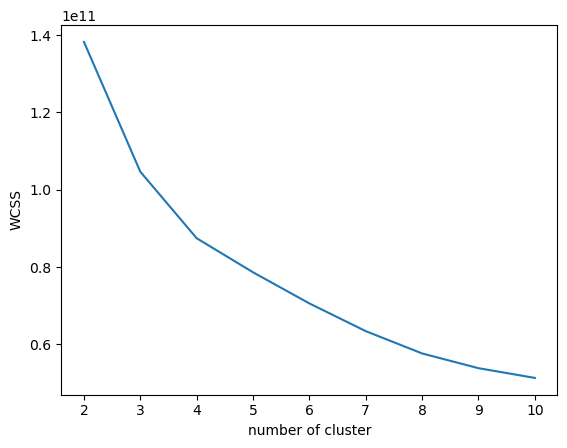

In [184]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [185]:
from kneed import KneeLocator

In [186]:
k=KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')

In [187]:
k.elbow

4

In [188]:
# prediction
kmeans=KMeans(n_clusters=4,init="k-means++")

In [189]:
y_labels = kmean.fit_predict(X_train)

In [190]:
y_labels

array([0, 5, 5, ..., 4, 5, 5])

In [191]:
y_train

72   -1.0
74   -1.0
5    -1.0
74   -1.0
0    -1.0
     ... 
87   -1.0
74   -1.0
16   -1.0
28   -1.0
21   -1.0
Name: Good/Bad, Length: 2786, dtype: float64

In [192]:
from sklearn.metrics import silhouette_score


In [193]:
# silhouette score find

silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [195]:
silhouette_coefficients

[0.5388395745075159,
 0.4575484625992703,
 0.43057039767765265,
 0.4247519566418445,
 0.3122294276245009,
 0.30913287834997494,
 0.3451465124700131,
 0.3033944283161648,
 0.27354775518985947]

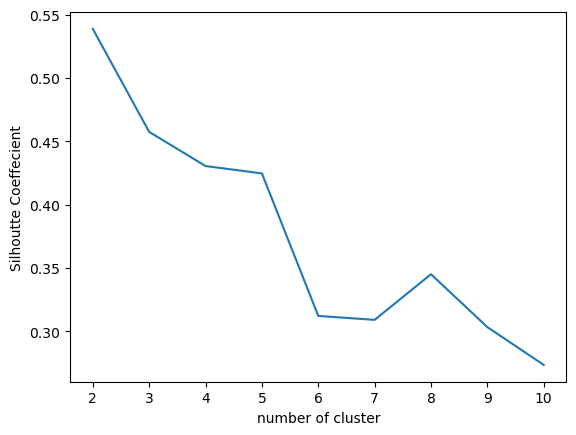

In [196]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("Silhoutte Coeffecient")
plt.show()
